In [1]:
import csv
import pandas as pd
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
df = pd.read_csv("../../data/data3size20.csv")
y = df['class']

In [2]:
img_list = []
size = 64
for i in range(len(df)):
    img_list.append(cv2.resize(cv2.imread("../../"+df.PATH[i]),(size,size)))
    
X_train, X_test, y_train, y_test = train_test_split(img_list, y, test_size=0.2,random_state=1)
X_test,X_val,y_test,y_val = train_test_split(X_test, y_test, test_size=0.5,random_state=1)

In [3]:
from tensorflow.keras.utils import to_categorical
X_train,X_val,X_test = np.array(X_train)/255.,np.array(X_val)/255.,np.array(X_test)/255.
y_train,y_val,y_test =  to_categorical((np.array(y_train)),3),to_categorical((np.array(y_val)),3),to_categorical((np.array(y_test)),3)

In [4]:
#モデルの設定
from tensorflow.keras import layers,models,initializers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
import sys
def model_build():
    size = 64
    model = models.Sequential()
    model.add(layers.Conv2D(16, (3, 3), activation='relu', input_shape=(size, size, 3)))
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Conv2D(32, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(layers.Conv2D(32, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(3, activation='softmax'))
    #model.summary()
    return model

In [5]:
model = model_build()
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 64)         

In [5]:
from tensorflow.python.keras.callbacks import TensorBoard
optim_list = ['adam','adamax','sgd']
l_list = []
model_list = []
for i in range(len(optim_list)):
    model_list.append(model_build())
    model_list[i].compile(
       optimizer = optim_list[i],
        loss='categorical_crossentropy',
        metrics=['accuracy'])

    #tsb = TensorBoard(log_dir='./logs')
    history = model_list[i].fit(X_train, y_train,
              batch_size=128,
              epochs=20,
              validation_data=(X_val,y_val))
    l_list.append(history.history)
    score = model_list[i].evaluate(X_test, y_test, verbose=0,batch_size=128)
    print(optim_list)
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])
    print()

Epoch 1/20
284/284 [==============================] - 15s 50ms/step - loss: 0.7792 - accuracy: 0.6885 - val_loss: 0.6233 - val_accuracy: 0.7720
Epoch 2/20
284/284 [==============================] - 14s 49ms/step - loss: 0.6382 - accuracy: 0.7586 - val_loss: 0.6006 - val_accuracy: 0.7749
Epoch 3/20
284/284 [==============================] - 14s 49ms/step - loss: 0.6155 - accuracy: 0.7660 - val_loss: 0.5732 - val_accuracy: 0.7784
Epoch 4/20
284/284 [==============================] - 14s 49ms/step - loss: 0.5917 - accuracy: 0.7674 - val_loss: 0.5509 - val_accuracy: 0.7877
Epoch 5/20
284/284 [==============================] - 14s 49ms/step - loss: 0.5415 - accuracy: 0.7837 - val_loss: 0.5204 - val_accuracy: 0.7950
Epoch 6/20
284/284 [==============================] - 14s 49ms/step - loss: 0.4904 - accuracy: 0.8077 - val_loss: 0.4773 - val_accuracy: 0.8082
Epoch 7/20
284/284 [==============================] - 14s 50ms/step - loss: 0.4564 - accuracy: 0.8204 - val_loss: 0.4572 - val_accuracy:

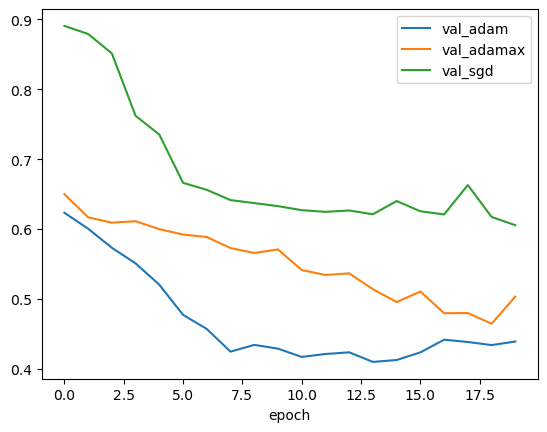

In [20]:
#l_list[0]['loss']

import matplotlib.pyplot as plt
plt.plot(history.epoch, l_list[0]['val_loss'], label="val_adam")
plt.plot(history.epoch, l_list[1]['val_loss'], label="val_adamax")
plt.plot(history.epoch, l_list[2]['val_loss'], label="val_sgd")

plt.xlabel("epoch")
plt.legend()
plt.show()

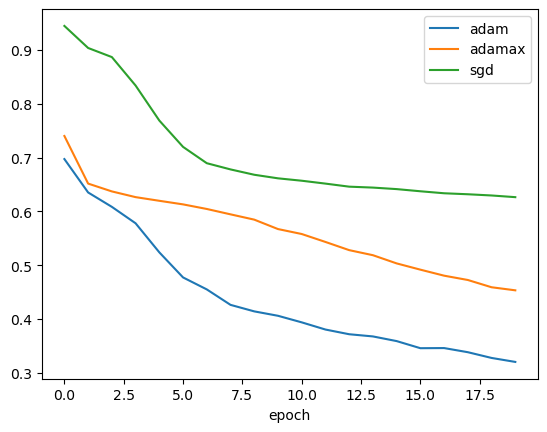

In [21]:
plt.plot(history.epoch, l_list[0]['loss'], label="adam")
plt.plot(history.epoch, l_list[1]['loss'], label="adamax")
plt.plot(history.epoch, l_list[2]['loss'], label="sgd")
plt.xlabel("epoch")
plt.legend()
plt.show()

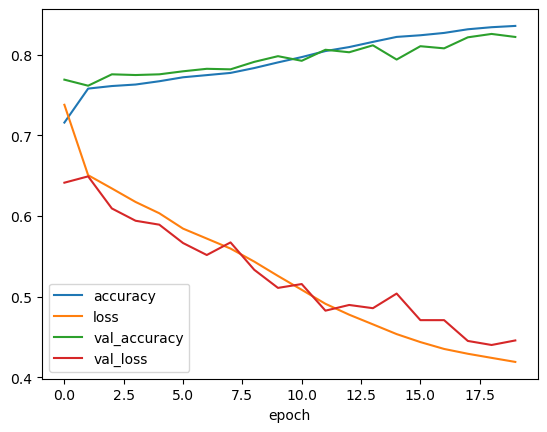

In [6]:
import matplotlib.pyplot as plt
plt.plot(history.epoch, history.history["accuracy"], label="accuracy")
plt.plot(history.epoch, history.history["loss"], label="loss")
plt.plot(history.epoch, history.history["val_accuracy"], label="val_accuracy")
plt.plot(history.epoch, history.history["val_loss"], label="val_loss")
plt.xlabel("epoch")
plt.legend()
plt.show()

In [7]:
print(type(history))
score = model.evaluate(X_test, y_test, verbose=0,batch_size=128)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

<class 'tensorflow.python.keras.callbacks.History'>
Test loss: 0.45489761233329773
Test accuracy: 0.8189635872840881


In [9]:
l_list[0]['loss']

[0.7136478424072266,
 0.6303278207778931,
 0.6087938547134399,
 0.5727185606956482,
 0.522699236869812,
 0.47449052333831787,
 0.44674381613731384,
 0.4302005171775818,
 0.4085219204425812,
 0.39904287457466125,
 0.38876238465309143,
 0.37934887409210205,
 0.3677206039428711,
 0.35939928889274597,
 0.35432302951812744,
 0.3418971002101898,
 0.33273011445999146,
 0.32651016116142273,
 0.31623929738998413,
 0.3086077868938446]

In [10]:
a_list = [xx,yy,zz]
xx = 1
yy = 3
zz = 5
a_list

NameError: name 'xx' is not defined